\- Lista de Exercícios III - 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1) Calculando área aproximada


   Empregando a função f(x) = 2x, integrada no intervalo \[1, 4\],
   tem-se como solução analítica 15.

   
   Elabore um programa que aplique a Soma de Riemann para estimar a área
   solicitando ao usuário o tamanho do passo (base do retângulo), apresente
   o valor estimado da área e o erro relativo.

   Os passos devem ser frações exatas de 1, como por exemplo:

   1, 0.5, 0.25, 0.125, 0.1, 0.0625, 0.05, 0.04, 0.03125, 0.025, 0.0125 etc

   para não extrapolarem o intervalo.
   

   Erro relativo = | analitico - aproximado | / | analítico |
   

   Plote o gráfico apresentando os retângulos, o valor aproximado e o erro
   relativo.

   Dica para plotar os retângulos: simplesmente usar plt.bar (deixando as cores sem interferir)
   
   https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html


   Para comparar o resultados, crie 3 gráficos (sub plots) na mesma plotagem
   e contabilize os três valores da área calculada:

   - pegando altura pela esquerda (antes do passo)

   - pegando altura no meio (métade do passo)

   - pegando altura pela direita (depois do passo)
   

In [2]:
def riemann_sum(f, inf, sup, dx, position):
    # Se a soma for pela extremiade direita, a compensacao
    # para comecar pelo lado correto vai ser o passo
    if position == 'right':
        comp = dx

    # Se for pelo centro, a compensacao e a metade do passo
    elif position == 'center':
        comp = dx/2

    # Caso seja pela esquerda, nao ha compensacao
    else:
        comp = 0

    # O resultado e calculado aplicando a funcao para
    # cada ponto da iteracao no intervalo definido
    result = np.asarray([[x, f(x)]
                        for x in np.arange(inf + comp, sup + comp, dx)])

    # Pontos do intervalo com passo dx, eixo x,
    # representando a base dos retangulos
    x = result[:, 0]
    # Imagem, f(x), do pontos do eixo x, sendo
    # tambem a altura dos retangulos
    y = result[:, 1]
    # Area abaixo da curva da funcao, somatoria da altura
    # de todos os retangulos, vezes o tamanho da base
    area = np.sum(y) * dx

    return x, y, area

In [3]:
def plot_riemann_sum(f, inf, sup, dx, solution):
    # Define tamanho da plotagem
    plt.figure(figsize=(10, 5))

    # Calcula a soma pela direita
    x, y, area = riemann_sum(f, inf, sup, dx, position='right')
    erro = np.abs(solution - area) / solution  # Erro relativo

    # Plotagem do resultado calculado pela direita
    plt.subplot(1, 3, 1)
    plt.plot(x, y, 'r.-', markersize=10)
    plt.bar(x, y, width=-dx, align='edge',
            color='r', alpha=0.3, edgecolor='r')
    plt.title(f'Área aproximada: {area:.1f}\nErro: {erro*100:.1f}%')

    # Calcula a soma pelo centro
    x, y, area = riemann_sum(f, inf, sup, dx, position='center')
    erro = np.abs(solution - area) / solution  # Erro relativo

    # Plotagem do resultado calculado pelo centro
    plt.subplot(1, 3, 2)
    plt.plot(x, y, 'g.-', markersize=10)
    plt.bar(x, y, width=dx, align='center',
            color='g', alpha=0.3,  edgecolor='g')
    plt.title(f'Área aproximada: {area:.1f}\nErro: {erro*100:.1f}%')

    # Calcula a soma pela esquerda
    x, y, area = riemann_sum(f, inf, sup, dx, position='left')
    erro = np.abs(solution - area) / solution  # Erro relativo

    # Plotagem do resultado calculado pela esquerda
    plt.subplot(1, 3, 3)
    plt.plot(x, y, 'b.-', markersize=10)
    plt.bar(x, y, width=dx, align='edge',
            color='b', alpha=0.3, edgecolor='b')
    plt.title(f'Área aproximada: {area:.1f}\nErro: {erro*100:.1f}%')
    plt.show()

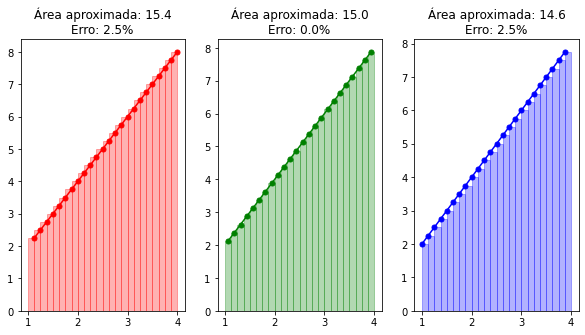

In [4]:
# Funcao f(x) = 2x
def f(x): return 2*x

inf = 1          # Limite inferior
sup = 4          # Limite superior
solution = 15    # Area calculada

# Passo para a some de riemann
dx = float(input('Enter dx: '))

# Funcao para calculo e plotagem da soma
plot_riemann_sum(f, inf, sup, dx, solution)

2) Desenvolva o mesmo algoritmo, agora usando um conjunto de funções 
   livremente escolhidas que graficamente simulem um pista de skate.

   Identifique as funções, algo como 4 segmentos de reta e uma parábola, 
   calcule a área usando a soma de Riemman, permitindo a escolha da 
   base do retângulo (o passo). 

   Escolha apenas uma aproximação para altura (esquerda, central ou direita),
   como melhor achar conveniente.

   Plote o gráfico apenas com fill-beetween (não precisa representar as barras).
   
   Idealmente, apresente no gráfico a legenda de cada função utilizada,
   a área aproximada calculada e se calculada analiticamente, a área exata
   resultante da integração.

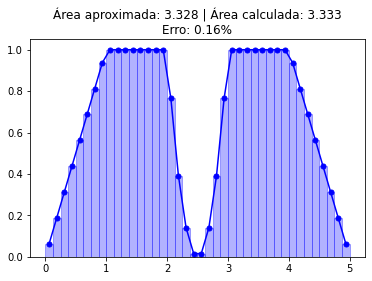

In [5]:
# Lista das funcoes
f_list = [lambda x:x,               # Reta crescente em [0, 1]
          lambda x:1,               # Constante em [1, 2]
          lambda x:(2*(x-2.5))**2,  # Parabola em [2, 3]
          lambda x:1,               # Constante em [3, 4]
          lambda x:-x+5]            # Reta decrescente [4, 5]

# Solucao calculada da soma das integrais das funcoes
solution = 3 + 1/3

# Passo para a some de riemann
dx = float(input('Enter dx: '))

# Calculo de cada funcao no intervalo
result = np.asarray([riemann_sum(f, i, i + 1, dx, position="center")
                     for i, f in enumerate(f_list)], dtype=object)

# Pontos no eixo x
x = np.hstack(result[:, 0])
# Pontos no eixo y
y = np.hstack(result[:, 1])
# Area total
area = np.sum(result[:, 2])
# Erro calculado
erro = np.abs(solution - area) / solution

# Plotagem do grafico
plt.plot(x, y, 'b.-', markersize=10)
plt.bar(x, y, width=dx, align='center',
        color='b', alpha=0.3, edgecolor='b')
plt.title(
    f'Área aproximada: {area:.3f} | Área calculada: {solution:.3f}\nErro: {erro*100:.2f}%')
plt.show()